In [6]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1, stratify = y)
print('Label counts in y: ', np.bincount(y))
print('Label counts in y_train: ', np.bincount(y_train))
print('Label counts in y_test: ', np.bincount(y_test))

Label counts in y:  [50 50 50]
Label counts in y_train:  [35 35 35]
Label counts in y_test:  [15 15 15]


In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified Examples: %d' % (y_test != y_pred).sum())

Misclassified Examples: 1


In [12]:
class LogisticRegressionGD:
    """
    Gradient descent-based logistic regression classifier.

    PARAMETERS
    ----------
    eta  :  float
        Learning rate between 0 and 1
    n_iter  :  int
        Passes over the dataset
    random_state  :  int
        Random number seed for random weight inits

    ATTRIBUTES
    ----------
    w_  :  1-d array
        Weights after training.
    b_  :  scalar
        Bias unit after fitting
    losses_  :  list
        MSE loss function values in each epoch.
    """

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data
        
        PARAMETERS
        ----------
        X  :  {Array-like}, shape = [n_examples, n_featers]
            Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y  :  array-like, shape = [n_examples] 
            Target values
            
        RETURNS
        -------
        self  :  Instance of LogisticRegressionGD
        """

        rgen= np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc= 0.0, scale =0.01, size = X.shape[1])
        self.b_ = np.float(0.)
        self.losses_ = []

        for iter in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y-output
            self.w_ += self.eta*2.0*X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta*2.0*errors.mean()
            loss = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))/X.shape[0])
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute logistic sigmoid activatoin"""
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= .5, 1, 0)

In [14]:
X_train_01_subset = X_train_std[(y_train== 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = .3,
                            n_iter = 1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)


C:\Users\alexn\AppData\Local\Temp\ipykernel_3044\3560278445.py:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


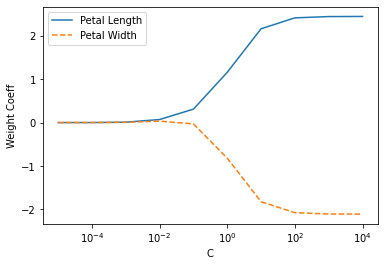

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
weights, params = [], []
for iter in np.arange(-5, 5):
    lr = LogisticRegression(C = 10.**iter,
    multi_class = 'ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**iter)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
    label = 'Petal Length')
plt.plot(params, weights[:, 1], linestyle = '--',
    label = 'Petal Width')
plt.ylabel('Weight Coeff')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state=1)
svm.fit(X_train_std, y_train)


SVC(kernel='linear', random_state=1)

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth = 4,
                                    random_state=1)
                                    
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

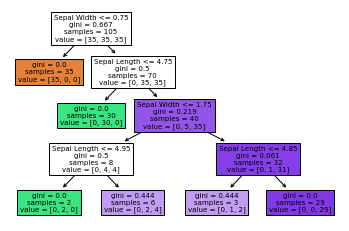

In [25]:
from sklearn import tree
feature_names = ['Sepal Length', 'Sepal Width',
                'Petal Length', 'Petal Width']
tree.plot_tree(tree_model,
                feature_names=feature_names,
                filled = 'true'
)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25,
                                random_state = 1,
                                n_jobs = 2)

forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)